# Matrix Factorization

In this task you are supposed to (manually) implement the matrix factorization variant you learned in the Data Cleaning chapter using the `numpy` library.

In [33]:
import numpy as np

We continue the scenario from the tutorials.

Assume that you have a ginormous database $D$ of three users and three movies and ratings provided by some users to some movies, which we represent as a matrix, where the entry $D_{ij}$ represents the rating user $i$ gave to movie $j$.
Since not all users have rated movies, and the rating ranges from 1 to 5, we encode missing ratings as 0.

In [34]:
# missing values encoded as 0
D = [
     [3,1,0],
     [1,0,3],
     [0,3,5],
    ]
D = np.array(D)

N = len(D)
M = len

First, randomly initialize the two factors $E$ and $A$ for $f=2$ latent features. For evaluating the correctness of your results from the tutorial, you may *additionally* provide hard-coded inital factors as they have been provided in the tutorial.

In [35]:
# number of latent features
f = 2

E = np.random.rand(len(D), f)
A = np.random.rand(f, len(D[0]))

print(E)
print(A)

[[0.21404076 0.19153873]
 [0.24008864 0.45787   ]
 [0.80794889 0.28041585]]
[[0.82486389 0.53757224 0.22445564]
 [0.24007077 0.68992402 0.51175486]]


Implement a function that takes the data matrix $D$, the inital factors $E, A$, the number of epochs (iterations), the learning rate $\eta$, and performs the factorization of $D$. Use a default number of 5000 for the epochs and 0.001 for $\eta$.

Updates to $E$ and $A$ are applied immediately. $\tilde{D}$ is updated after an entry from D was completely dealt with. Update ordered by latent features and E before A.

In [36]:
def train(D: np.ndarray, E: np.ndarray, A: np.ndarray, learning_rate: float = 0.001, epochs: int = 5000) -> list[float]:
    temp = []
    for _ in range(epochs):
        Dt = np.matmul(E, A)

        # calculate the sse-gradient
        d_sse = 2*(D - Dt)

        # calculate the Summed-Squared-Error to visualize an error-curve later.
        sse = 0
        for i in range(len(D)):
            for j in range(len(D)):
                if D[i][j] != 0:
                    sse += (D[i][j] - Dt[i][j])**2
                    # parameter updates on every latent factor as well a with epoch size 1
                    for k in range(f):
                        # hmm shouldn't there be a way to update all parameters by directly doing matrix multiplication?
                        E[i][k] = E[i][k] + learning_rate * d_sse[i][j] * A[k][j]
                        A[k][j] = A[k][j] + learning_rate * d_sse[i][j] * E[i][k]
        #print(sse)
        temp.append(sse)
    return temp
    
    print(np.matmul(E, A))


Now test your matrix factorization for the parameters sepcified above.

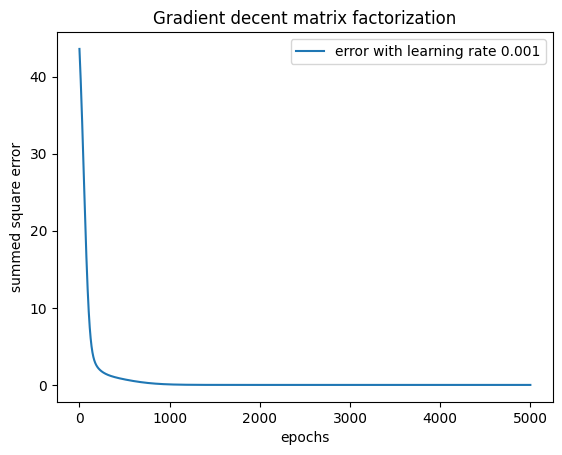

In [37]:
# "DEA" lmao
errors = train(D, E, A)

import matplotlib.pyplot as plt

plt.title("Gradient decent matrix factorization")
plt.plot(errors)


plt.xlabel("epochs")
plt.ylabel("summed square error")
plt.legend(["error with learning rate 0.001"])
plt.show()